In [22]:
import sqlite3

# Step 1: Setting up SQLite Database
# Create a database names superhero_db.sqlite
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

# Create heroes table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS heroes (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        power TEXT NOT NULL,
        team TEXT
    )
''')

# Create villains table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS villains (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        evil_plan TEXT NOT NULL
    )
''')

# Create battles table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS battles (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_id INTEGER,
        villain_id INTEGER,
        outcome TEXT NOT NULL,
        FOREIGN KEY (hero_id) REFERENCES heroes(id),
        FOREIGN KEY (villain_id) REFERENCES villains(id)
    )
''')

conn.commit()
conn.close()


In [23]:
# Step 2: Import Data from CSV Files
from google.colab import files
uploaded = files.upload()

import pandas as pd

conn = sqlite3.connect("superhero_db.sqlite")

# Load and insert heroes data
heroes_df = pd.read_csv("heroes.csv")
heroes_df.to_sql("heroes", conn, if_exists="replace", index=False) # Change to 'replace'

# Load and insert villains data
villains_df = pd.read_csv("villains.csv")
villains_df.to_sql("villains", conn, if_exists="replace", index=False)

# Load and insert battles data
battles_df = pd.read_csv("battles.csv")
battles_df.to_sql("battles", conn, if_exists="replace", index=False)

# Fix the typo: 'con' should be 'conn'
cursor = conn.cursor() # Changed 'con' to 'conn'
cursor.execute("SELECT name, power FROM heroes")

conn.commit()
conn.close()

Saving battles.csv to battles (7).csv
Saving heroes.csv to heroes (7).csv
Saving villains.csv to villains (7).csv


In [24]:
# Step 3: Querying the Database
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

# Query 1: Retrieve all superheroes and their powers
cursor.execute("SELECT name, power FROM heroes")
print(cursor.fetchall())

# Query 2: Find battles where the hero won
cursor.execute("SELECT h.name, b.outcome FROM battles b JOIN heroes h ON b.hero_id = h.id WHERE b.outcome = 'Hero Wins'")
print(cursor.fetchall())

# Query 3: List all villains and their evil plans
cursor.execute("SELECT name, evil_plan FROM villains")
print(cursor.fetchall())

# Query 4: Superhero with most battles
cursor.execute("SELECT h.name, COUNT(*) as battle_count FROM battles b JOIN heroes h ON b.hero_id = h.id GROUP BY h.id ORDER BY battle_count DESC LIMIT 1")
print(cursor.fetchall())

conn.close()


[('Spider-Man', 'Web-slinging'), ('Iron Man', 'Powered Armor'), ('Batman', 'Genius Detective'), ('Superman', 'Super Strength'), ('Thor', 'God of Thunder'), ('Wonder Woman', 'Amazonian Strength'), ('Black Panther', 'Enhanced Agility'), ('The Flash', 'Super Speed'), ('Hulk', 'Super Strength'), ('Doctor Strange', 'Mystic Arts')]
[('Hulk', 'Hero Wins'), ('Spider-Man', 'Hero Wins'), ('Hulk', 'Hero Wins'), ('Batman', 'Hero Wins'), ('Black Panther', 'Hero Wins'), ('The Flash', 'Hero Wins'), ('Batman', 'Hero Wins'), ('Batman', 'Hero Wins'), ('Thor', 'Hero Wins')]
[('Green Goblin', 'Terrorize New York'), ('Thanos', 'Collect all Infinity Stones'), ('Joker', 'Spread chaos in Gotham'), ('Lex Luthor', 'Defeat Superman'), ('Loki', 'Trick humanity into worshiping him'), ('Ultron', 'AI world domination'), ('Darkseid', 'Control the universe'), ('Venom', 'Consume Spider-Man'), ('Magneto', 'Mutant supremacy'), ('Red Skull', 'Revive Hydra')]
[('Batman', 7)]


In [33]:
# Step 4: Adding Sidekick Feature
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

# Create sidekicks table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sidekicks (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_id INTEGER NOT NULL,
        sidekick_name TEXT NOT NULL,
        UNIQUE(hero_id, sidekick_name),
        FOREIGN KEY (hero_id) REFERENCES heroes(id)
    )
''')

# Insert sample data
cursor.executemany('''
    INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (?, ?)
''', [(1, 'Robin'), (2, 'War Machine')])

conn.commit()
conn.close()

In [34]:
# Testing Sidekick
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

cursor.execute("SELECT h.name, s.sidekick_name FROM heroes h JOIN sidekicks s ON h.id = s.hero_id")
print(cursor.fetchall())

conn.close()

[('Spider-Man', 'Robin'), ('Spider-Man', 'Robin'), ('Spider-Man', 'Robin'), ('Spider-Man', 'Robin'), ('Spider-Man', 'Robin'), ('Iron Man', 'War Machine'), ('Iron Man', 'War Machine'), ('Iron Man', 'War Machine'), ('Iron Man', 'War Machine'), ('Iron Man', 'War Machine')]


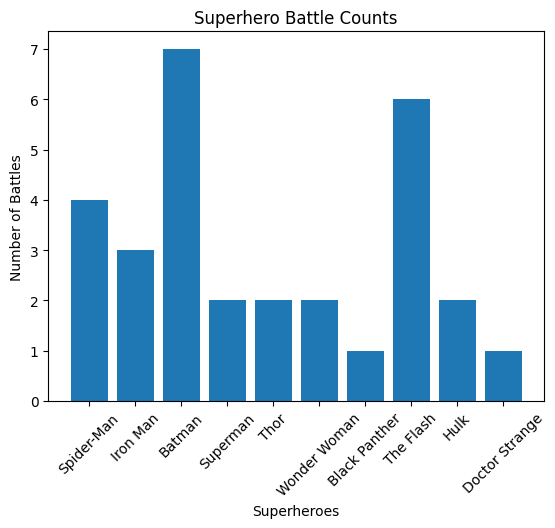

In [11]:
# Step 5: Bonus Challenge
import matplotlib.pyplot as plt

conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

cursor.execute("SELECT h.name, COUNT(*) FROM battles b JOIN heroes h ON b.hero_id = h.id GROUP BY h.id")
data = cursor.fetchall()
conn.close()

heroes, battle_counts = zip(*data)

plt.bar(heroes, battle_counts)
plt.xlabel("Superheroes")
plt.ylabel("Number of Battles")
plt.title("Superhero Battle Counts")
plt.xticks(rotation=45)
plt.show()